In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Minwage.csv")

act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value":name}))

act_min_wage.head()

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,0.981938,0.986455,0.970585,0.992234,0.971193,0.973326,0.979386,0.986835,0.958666,...,0.989706,0.959445,0.991785,0.980783,0.961031,0.992841,0.974007,0.984063,0.966210,0.876241
Arkansas,0.981938,1.000000,0.981222,0.974544,0.980991,0.971062,0.976168,0.975847,0.989265,0.951022,...,0.982317,0.957945,0.986417,0.984424,0.954685,0.982433,0.965271,0.983518,0.961117,0.816334
California,0.986455,0.981222,1.000000,0.987726,0.992328,0.969744,0.982806,0.967800,0.981436,0.946857,...,0.985984,0.946763,0.989798,0.974206,0.946546,0.992023,0.987628,0.977868,0.950854,0.873317
Colorado,0.970585,0.974544,0.987726,1.000000,0.980025,0.968148,0.986274,0.961301,0.973284,0.942145,...,0.977187,0.939117,0.980496,0.970238,0.940727,0.982147,0.982347,0.972318,0.943689,0.845495
Connecticut,0.992234,0.980991,0.992328,0.980025,1.000000,0.981611,0.972706,0.976996,0.984969,0.963695,...,0.993275,0.965274,0.994482,0.979789,0.964255,0.997531,0.984275,0.986163,0.971129,0.894385


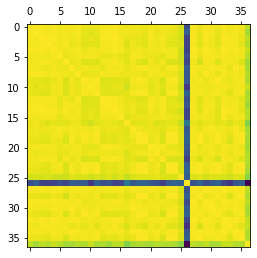

In [2]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

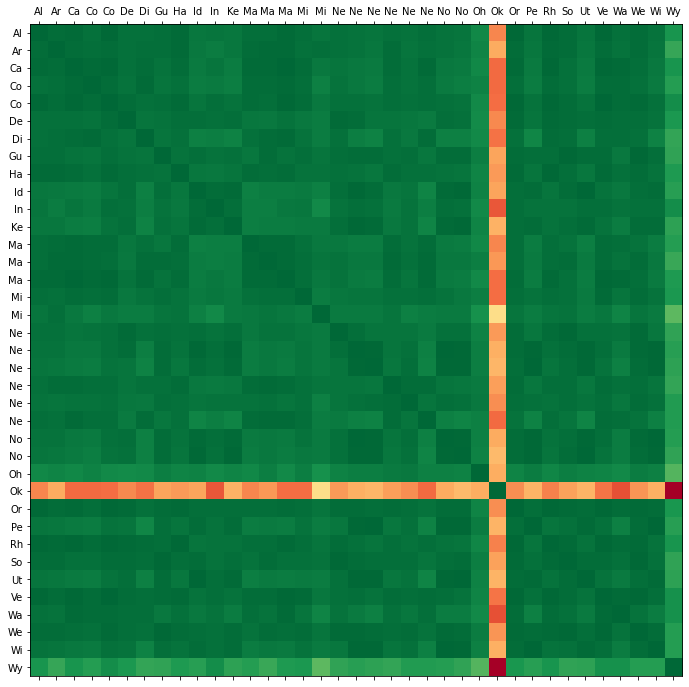

In [5]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()


In [6]:
labels

['Al',
 'Ar',
 'Ca',
 'Co',
 'Co',
 'De',
 'Di',
 'Gu',
 'Ha',
 'Id',
 'In',
 'Ke',
 'Ma',
 'Ma',
 'Ma',
 'Mi',
 'Mi',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'No',
 'No',
 'Oh',
 'Ok',
 'Or',
 'Pe',
 'Rh',
 'So',
 'Ut',
 'Ve',
 'Wa',
 'We',
 'Wi',
 'Wy']

In [7]:
import pandas as pd
import requests

web = requests.get("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")

dfs = pd.read_html(web.text)

In [8]:
for df in dfs:
    print(df.head())

  State Name/District Postal Abbreviation Postal Code
0             Alabama                Ala.          AL
1              Alaska              Alaska          AK
2             Arizona               Ariz.          AZ
3            Arkansas                Ark.          AR
4          California              Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [9]:
state_abv = dfs[0]
state_abv.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [10]:
state_abv.to_csv("state_abv.csv", index = False)